<a href="https://colab.research.google.com/github/skbhere/Simple-forecast-predicion-for-Covid-19-/blob/master/02_Mdu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv("https://api.covid19india.org/csv/latest/districts.csv")

In [4]:
df=df.loc[df['District'] == "Madurai"]

In [5]:
DF=df
DF.rename(columns={'Confirmed':'Total Confirmed',
                          'Recovered':'Total Recovered',
                          'Deceased':'Total Deceased'}, 
                 inplace=True)
xx=len(DF) - 1
DF=DF.head(xx)

In [6]:
DF

,Date,State,District,Total Confirmed,Total Recovered,Total Deceased,Migrated,Tested
317,2020-04-26,Tamil Nadu,Madurai,75,8,2,0,NaN
750,2020-04-27,Tamil Nadu,Madurai,79,8,2,0,NaN
1194,2020-04-28,Tamil Nadu,Madurai,79,36,2,0,NaN
1642,2020-04-29,Tamil Nadu,Madurai,79,40,2,0,NaN
2091,2020-04-30,Tamil Nadu,Madurai,84,40,2,0,NaN
...,...,...,...,...,...,...,...,...
54724,2020-07-20,Tamil Nadu,Madurai,8357,4934,160,0,23092.0
55438,2020-07-21,Tamil Nadu,Madurai,8517,5070,167,0,23092.0
56152,2020-07-22,Tamil Nadu,Madurai,8705,5515,174,0,23092.0
56866,2020-07-23,Tamil Nadu,Madurai,8984,5965,183,0,97279.0


In [7]:
TConfirmed = list(DF["Total Confirmed"])
DConfirmed = [None] * len(DF)
i = 1
while i < len(DF):
    DConfirmed[i]=TConfirmed[i]-TConfirmed[i-1]
    i += 1
DF["Daily Confirmed"]=DConfirmed
DF["Day"]=range(1,xx+1)
i = range(0,len(DF))
DF['Index']=i
DF=DF.set_index('Index')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [8]:
xlen=len(DF)
sp=round(xlen*0.9)
DF['Date'] = pd.to_datetime(DF['Date'])
DF.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89],
           dtype='int64', name='Index')

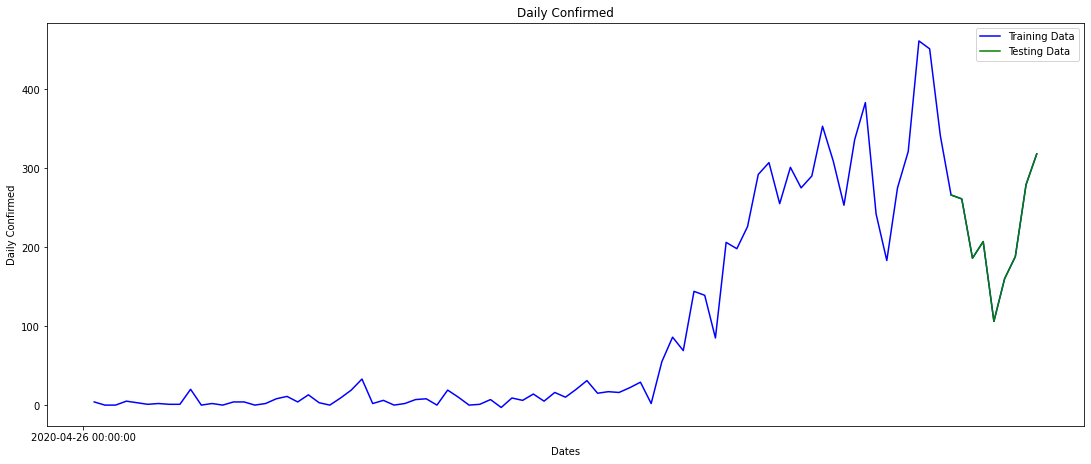

In [9]:
import matplotlib.pyplot as plt
train_data, test_data = DF[0:sp], DF[sp:]
fig= plt.figure(figsize=(18,7))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
#plt.figure(figsize=(12,7))
plt.title('Daily Confirmed')
plt.xlabel('Dates')
plt.ylabel('Daily Confirmed')
plt.plot(DF['Daily Confirmed'], 'blue', label='Training Data')
plt.plot(test_data['Daily Confirmed'], 'green', label='Testing Data')
plt.xticks(np.arange(0,sp,xlen), DF['Date'][0:sp:xlen])
plt.legend()

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
train_ar = train_data['Daily Confirmed'].values
test_ar = test_data['Daily Confirmed'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    my_order = (1, 1, 1)
    my_seasonal_order = (1, 1, 1, 12)
    model = SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order)
    #model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)



<class 'list'>


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing Mean Squared Error: 13394.674
Symmetric mean absolute percentage error: 33.640


In [ ]:
f=[]
def forecast(x) :
  f = model_fit.forecast(steps=x)
  f = np.round(f)
  return f

In [ ]:
forecast(5)

array([409., 391., 346., 434., 456.])

In [10]:
df=DF

NameError: ignored

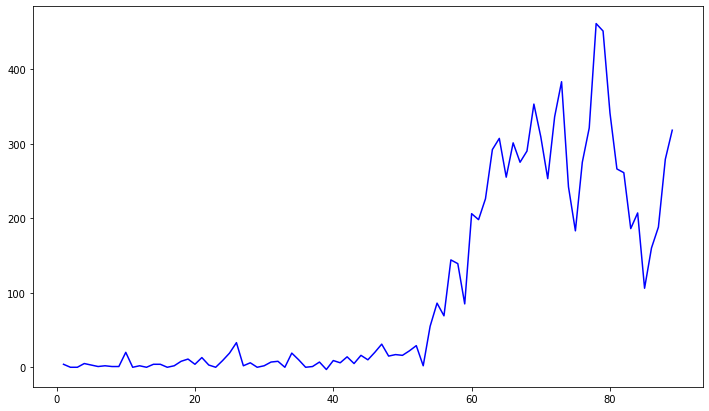

In [11]:
plt.figure(figsize=(12,7))
plt.plot(df['Daily Confirmed'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Daily Confirmed'], color='red', label='Actual Price')
plt.title('Daily Confirmed Prediction')
plt.xlabel('Dates')
plt.ylabel('Daily Confirmed')
plt.xticks(np.arange(0,sp,xlen), df['Date'][0:sp:xlen])
plt.legend()

In [19]:
df2 = DF.tail(6)
df1 =DF.tail(6)

In [20]:
X1 = np.array(df1['Day'])
X2 = np.array(df2['Day'])
#Y1 = np.array(df1['Total Confirmed'])
#Y2 = np.array(df1['Total Recovered'])
#Y3 = np.array(df1['Total Deceased'])
Y1 = np.log(df1['Total Confirmed'])
Y1 = np.array(Y1)
Y2 = np.log(df1['Total Recovered'])
Y2 = np.array(Y2)
Y3 = np.log(df1['Total Deceased'])
Y3 = np.array(Y3)
#Y4 = np.array(df2['Daily Confirmed'])

Y4 =np.log(df2['Daily Confirmed'])
Y4 = np.array(Y4)


In [21]:
from sklearn.linear_model import LinearRegression
X1=X1.reshape(-1, 1)
X2=X2.reshape(-1, 1)
Y1=Y1.reshape(-1, 1)
Y2=Y2.reshape(-1, 1)
Y3=Y3.reshape(-1, 1)
Y4=Y4.reshape(-1, 1)

reg1 = LinearRegression().fit(X1, Y1)
reg2 = LinearRegression().fit(X1, Y2)
reg3 = LinearRegression().fit(X1, Y3)
reg4 = LinearRegression().fit(X2, Y4)


logb1 = reg1.coef_
loga1 = reg1.intercept_
a1 = np.exp(loga1)
b1 = np.exp(logb1)

logb2 = reg2.coef_
loga2 = reg2.intercept_
a2 = np.exp(loga2)
b2 = np.exp(logb2)

logb3 = reg3.coef_
loga3 = reg3.intercept_
a3 = np.exp(loga3)
b3 = np.exp(logb3)

logb4 = reg4.coef_
loga4 = reg4.intercept_
a4 = np.exp(loga4)
b4 = np.exp(logb4)



#print("Based on Last 20 Days Data")
#print ("Total Confirmed Accuracy", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Confirmed", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Recovered ", reg2.score(X1, Y2)*100)
print ("coefficient of determination for Total Deceased ", reg3.score(X1, Y3)*100)
print("coefficient of determination for Based on Last 30 Days Data")
print ("coefficient of determination for Daily Confirmed ", reg4.score(X2, Y4)*100)
#print ("coefficient of determination for Daily Recovered ", reg5.score(X2, Y5)*100)
#print ("coefficient of determination for Daily Deceased ", reg6.score(X2, Y6)*100)


coefficient of determination for Total Confirmed 97.0131804107589
coefficient of determination for Total Recovered  95.16957305641738
coefficient of determination for Total Deceased  99.31306241645068
coefficient of determination for Based on Last 30 Days Data
coefficient of determination for Daily Confirmed  49.58401671801174


In [23]:
drange = 15
start =len(df) +1
dval = np.arange(start,start+drange,1)
dval= np.array(dval)
val= dval
dval=dval.reshape(-1, 1)

start1 =len(DF)
dval1 = np.arange(start1,start1+drange,1)
dval1= np.array(dval1)
val1= dval1
dval1=dval1.reshape(-1, 1)
import datetime
base = datetime.date.today() - datetime.timedelta(days=1)
date_list = [base + datetime.timedelta(days=x) for x in range(drange)]

# DConfirmed = forecast(drange+1)
# DConfirmed =DConfirmed[:-1]
DConfirmed = np.round_(np.multiply(a4,(np.power(b4,val))))
TConfirmed = np.round_(np.multiply(a1,(np.power(b1,val1))))
#TConfirmed = np.round_(reg1.predict(dval1))
#DRecovered = np.round_(np.multiply(a5,(np.power(b5,val))))
#TRecovered = np.round_(np.multiply(a2,(np.power(b2,val1))))
#TRecovered = np.round_(reg2.predict(dval1))
#DDeceased = np.round_(np.multiply(a6,(np.power(b6,val))))
#TDeceased = np.round_(np.multiply(a3,(np.power(b3,val1))))
#TDeceased = np.round_(reg3.predict(dval1))

# DConfirmed= DConfirmed.flatten()
# TConfirmed= TConfirmed.flatten()
# i = 1
# while i < len(TConfirmed):
#     DConfirmed[i]=TConfirmed[i]-TConfirmed[i-1]
#     i += 1
ii=len(DF)-1
lastD = DF['Daily Confirmed'][ii]
lastT = DF['Total Confirmed'][ii]
lastDat = DF['Date'][ii]
new_row = pd.DataFrame({'Daily Confirmed':lastD.flatten() ,
                        'Total Confirmed':lastT.flatten(),
                        'Date': pd.to_datetime(lastDat)
                        })
#DConfirmed[0]=DF['Total Confirmed'][0]-TConfirmed[0]
dict = {
        'Date' : date_list,
        'Daily Confirmed': DConfirmed.flatten(), 
        'Total Confirmed': TConfirmed.flatten(), 
   #     'Daily Recovered': DRecovered.flatten() ,
    #    'Total Recovered': TRecovered.flatten(),
    #    'Daily Deceased' : DDeceased.flatten(),
     #   'Total Deceased' : TDeceased.flatten(),
        'Day' : dval1.flatten() ,
       } 
final = pd.DataFrame(dict) 
final = pd.concat([new_row, final]).reset_index(drop = True) 
final['Date'] = pd.to_datetime(final['Date'])
final.head(5) 

,Daily Confirmed,Total Confirmed,Date,Day
0,318.0,9302.0,2020-07-24,NaN
1,332.0,9214.0,2020-07-24,90.0
2,385.0,9437.0,2020-07-25,91.0
3,447.0,9666.0,2020-07-26,92.0
4,519.0,9900.0,2020-07-27,93.0


In [24]:
final.head(20)

,Daily Confirmed,Total Confirmed,Date,Day
0,318.0,9302.0,2020-07-24,NaN
1,332.0,9214.0,2020-07-24,90.0
2,385.0,9437.0,2020-07-25,91.0
3,447.0,9666.0,2020-07-26,92.0
4,519.0,9900.0,2020-07-27,93.0
5,602.0,10141.0,2020-07-28,94.0
6,699.0,10386.0,2020-07-29,95.0
7,811.0,10638.0,2020-07-30,96.0
8,941.0,10896.0,2020-07-31,97.0
9,1092.0,11160.0,2020-08-01,98.0


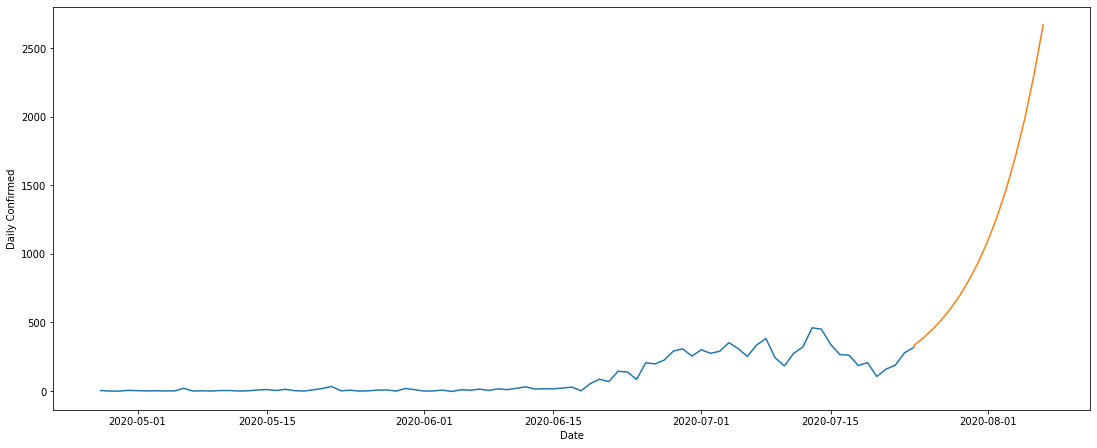

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(18,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = df['Date']
position =df['Daily Confirmed']

time1 = final['Date']
position1 = final['Daily Confirmed']

axes.plot(time, position)
axes.plot(time1, position1)
plt.xlabel('Date')
plt.ylabel('Daily Confirmed')

plt.show()
fig.savefig('MDU_Daily.png')


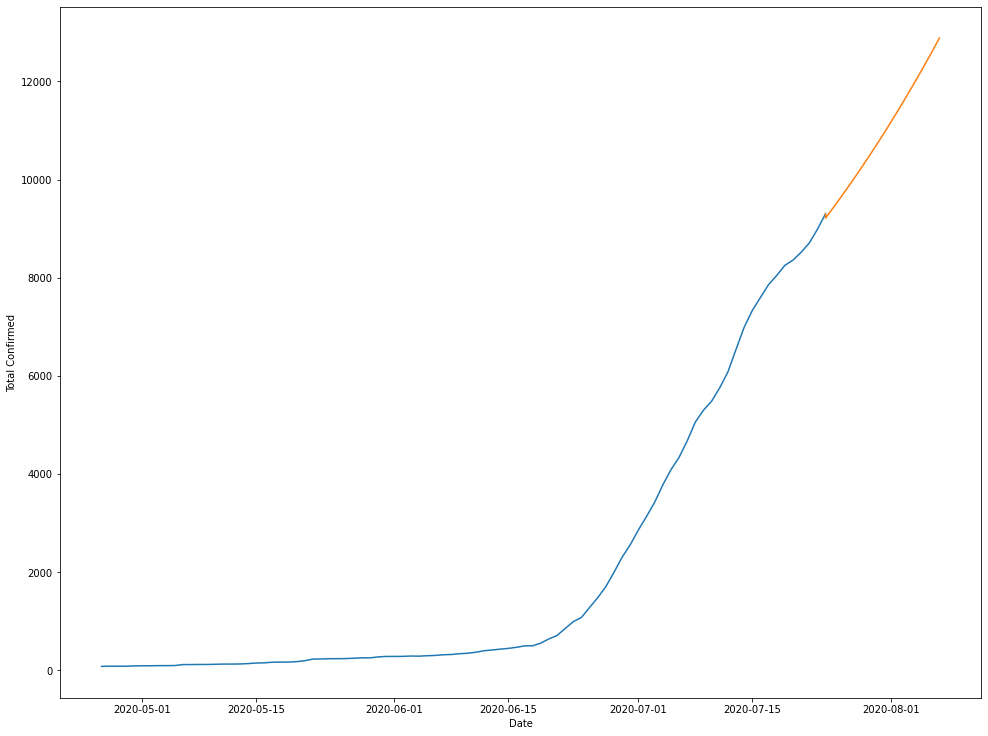

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(16,12))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = DF['Date']
position =DF['Total Confirmed']

time1 = final['Date']
position1 = final['Total Confirmed']
axes.plot(time, position)
axes.plot(time1, position1)

plt.xlabel('Date')
plt.ylabel('Total Confirmed')
fig.savefig('MDU_Total.png')

In [27]:
#save to Csv
final = final.iloc[1:]
final.to_csv("predictMDU.csv")
pr=pd.read_csv('predictMDU.csv')
pr.head()

,Unnamed: 0,Daily Confirmed,Total Confirmed,Date,Day
0,1,332.0,9214.0,2020-07-24,90.0
1,2,385.0,9437.0,2020-07-25,91.0
2,3,447.0,9666.0,2020-07-26,92.0
3,4,519.0,9900.0,2020-07-27,93.0
4,5,602.0,10141.0,2020-07-28,94.0


In [35]:
#Doubling Rate for every 7 days 
T1=DF['Total Confirmed']
an = 6
reminder = (len(T1)%an) 
if reminder != 0 :
  T1 = T1[0:-reminder]
re = ((len(T1))// an )
Week=range(0,re)
T1 = T1.to_numpy()
T1=T1.reshape(re,an) 
double =  []
print(len(T1))
for n in range(0,len(T1)):
  l2 = np.log(2)
  Diff = np.log(T1[n][an-1]/T1[n][0])
  V= l2*(an-1)/Diff
  double.append(V)
WL = DF['Date']
WL=WL[6::an]
DRate = pd.DataFrame(list(zip(double, Week,WL)), 
               columns =['DRate', 'Weeks','Date'])
DRate.tail()

15


,DRate,Weeks,Date
9,5.185934,9,2020-06-25
10,5.002822,10,2020-07-01
11,8.305315,11,2020-07-07
12,13.194738,12,2020-07-13
13,16.731190,13,2020-07-19


<Figure size 1296x432 with 0 Axes>

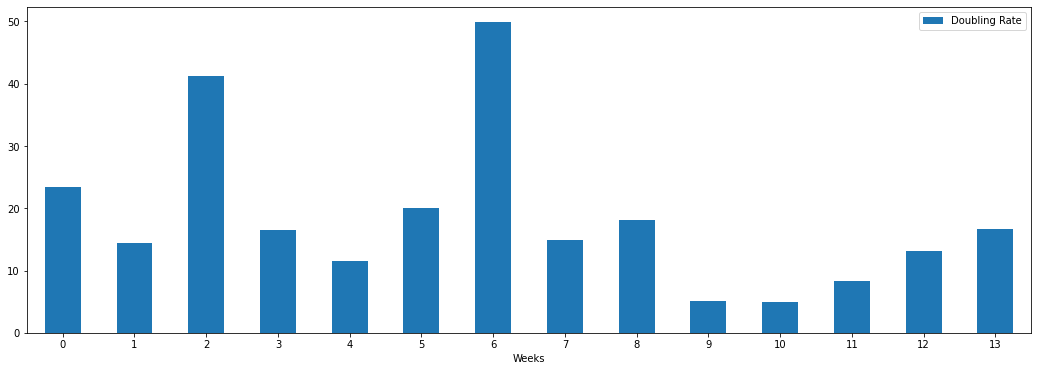

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(18,6))
ax = DRate.plot.bar(x='Weeks', y='DRate', rot=0,figsize=(18,6),label='Doubling Rate' )
plt.savefig('MDu Doubling Rate')

In [91]:
df= pd.read_csv("https://api.covid19india.org/csv/latest/districts.csv")
df1=df.loc[df['District'] == "Wayanad"]
df1.tail()

,Date,State,District,Confirmed,Recovered,Deceased,Migrated,Tested
55184,2020-07-21,Kerala,Wayanad,311,122,1,0,NaN
55898,2020-07-22,Kerala,Wayanad,315,127,1,0,NaN
56612,2020-07-23,Kerala,Wayanad,325,132,1,0,NaN
57326,2020-07-24,Kerala,Wayanad,340,153,1,0,NaN
58039,2020-07-25,Kerala,Wayanad,340,153,1,0,NaN


In [92]:
T1=df1['Confirmed']
an = 6
reminder = (len(T1)%an) 
if reminder != 0 :
  T1 = T1[0:-reminder]
re = ((len(T1))// an )
Week=range(0,re)
T1 = T1.to_numpy()
T1=T1.reshape(re,an) 
double =  []
print(len(T1))
for n in range(0,len(T1)):
  l2 = np.log(2)
  Diff = np.log(T1[n][an-1]/T1[n][0])
  V= l2*(an-1)/Diff
  double.append(V)
WL = DF['Date']
WL=WL[6::an]
DRate = pd.DataFrame(list(zip(double, Week,WL)), 
               columns =['DRate', 'Weeks','Date'])
DRate.tail()

15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


,DRate,Weeks,Date
9,17.519135,9,2020-06-25
10,20.167185,10,2020-07-01
11,20.553197,11,2020-07-07
12,9.716791,12,2020-07-13
13,9.308665,13,2020-07-19


<Figure size 1296x432 with 0 Axes>

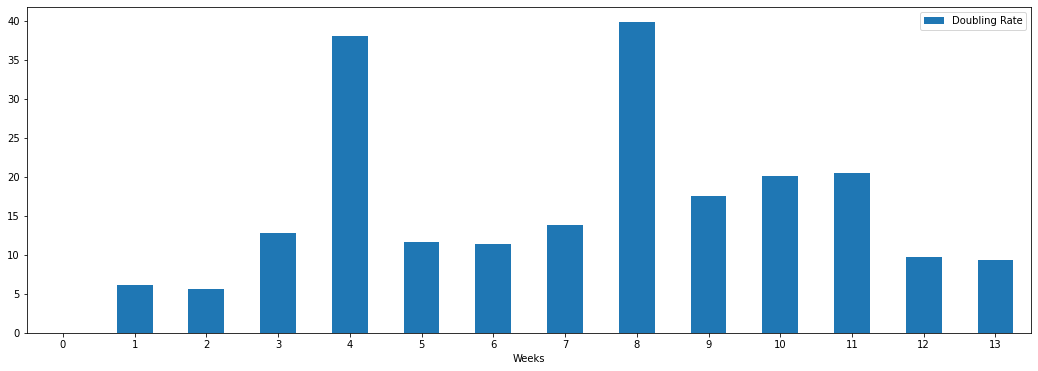

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(18,6))
ax = DRate.plot.bar(x='Weeks', y='DRate', rot=0,figsize=(18,6),label='Doubling Rate' )
plt.savefig('MDu Doubling Rate')